<Figure size 1000x400 with 0 Axes>

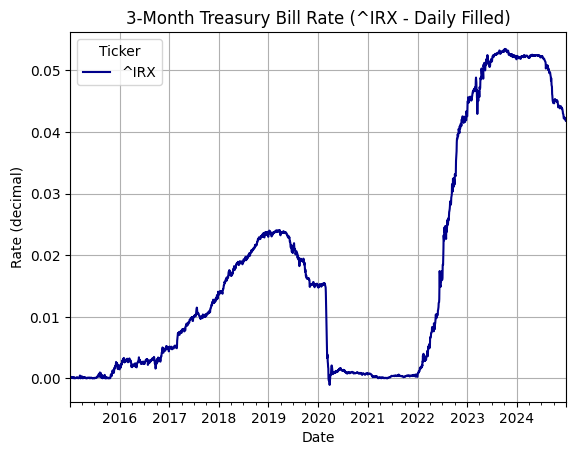

<Figure size 1000x400 with 0 Axes>

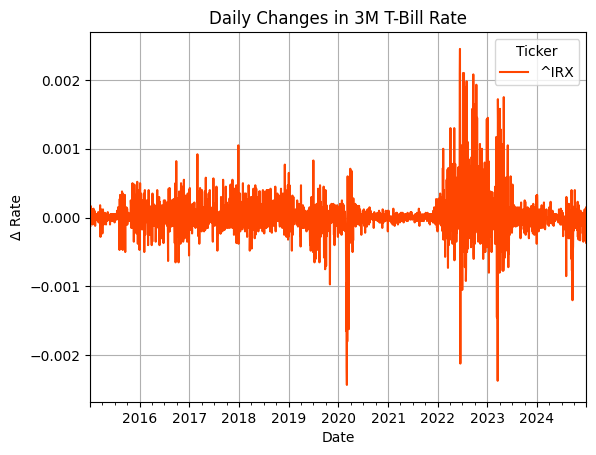

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download short-term interest rate from Yahoo Finance
def get_short_rate_data(ticker='^IRX', start='2015-01-01', end='2024-12-31'):
    data = yf.download(ticker, start=start, end=end, progress=False)
    # Use 'Close' if 'Adj Close' is not present
    if 'Adj Close' in data.columns:
        data = data['Adj Close'] / 100  # Convert percent to decimal
    elif 'Close' in data.columns:
        data = data['Close'] / 100
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' found in data columns: " + str(data.columns))
    data = data.dropna()
    data.name = "ShortRate"
    return data

# Step 2: Get and preprocess the data
rate = get_short_rate_data()
rate = rate.asfreq('B')       # Business day frequency
rate = rate.ffill()           # Forward fill missing data

# Step 3: Plot the rate
plt.figure(figsize=(10, 4))
rate.plot(title="3-Month Treasury Bill Rate (^IRX - Daily Filled)", color='darkblue')
plt.grid(True)
plt.ylabel("Rate (decimal)")
plt.show()

# Step 4: Plot daily change in rate
delta_r = rate.diff().dropna()
plt.figure(figsize=(10, 4))
delta_r.plot(title="Daily Changes in 3M T-Bill Rate", color='orangered')
plt.grid(True)
plt.ylabel("Δ Rate")
plt.show()

In [7]:
print(rate.head())
print(delta_r.describe())


Ticker         ^IRX
Date               
2015-01-02  0.00015
2015-01-05  0.00003
2015-01-06  0.00020
2015-01-07  0.00020
2015-01-08  0.00018
Ticker         ^IRX
count   2606.000000
mean       0.000016
std        0.000291
min       -0.002430
25%       -0.000070
50%        0.000000
75%        0.000080
max        0.002450


In [9]:
rate.to_csv('short_rate_data.csv', header=True)
delta_r.to_csv('short_rate_changes.csv', header=True)

In [11]:
rate.info

<bound method DataFrame.info of Ticker         ^IRX
Date               
2015-01-02  0.00015
2015-01-05  0.00003
2015-01-06  0.00020
2015-01-07  0.00020
2015-01-08  0.00018
...             ...
2024-12-24  0.04200
2024-12-25  0.04200
2024-12-26  0.04215
2024-12-27  0.04178
2024-12-30  0.04182

[2607 rows x 1 columns]>